In [1]:
import numpy as np
import pandas as pd

In [3]:
from git import Repo 

In [ ]:
import git  # pip install gitpython
git.Repo.clone_from("https://github.com/*****", "folderToSave")

In [ ]:
Repo.clone_from('https://github.com/jbrownlee/Datasets.git', 'Datasets')

## Uniformity

#### In this chapter
##### Chapter 3 - Advanced data problems


#### Uniformity

In [ ]:
Column           Unit
Temperature      32°Cis also89.6°F
Weight           70 Kgis also11 st.
Date             26-11-2019 is also26, November, 2019
Money            100$is also 10763.90¥

In [2]:
temperatures = pd.read_csv('temperatures.csv')
temperatures.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
temperatures.rename(columns={'Temp':'Temperature'}, inplace=True)

In [8]:
temperatures.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [35]:
df = temperatures[(temperatures['Date'] >= '1990-01-03') & (temperatures['Date'] < '1990-02-01')]

In [36]:
df

,Date,Temperature
3287,1990-01-03,15.6
3288,1990-01-04,14.5
3289,1990-01-05,14.3
3290,1990-01-06,15.3
3291,1990-01-07,16.4
3292,1990-01-08,14.8
3293,1990-01-09,17.4
3294,1990-01-10,18.8
3295,1990-01-11,22.1
3296,1990-01-12,19.0


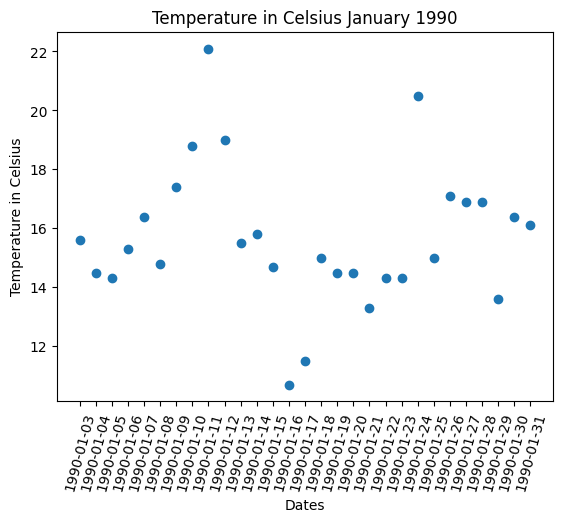

In [40]:
# Import matplotlib
import matplotlib.pyplot as plt
# Create scatter plot
plt.scatter(x = 'Date', y = 'Temperature', data = df)
# Create title, xlabel and ylabel
plt.title('Temperature in Celsius January 1990')
plt.xlabel('Dates')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=75)
# Show plot
plt.show()


### Treating temperature data

C=(F−32) × 5\9

In [ ]:
temp_fah = temperatures.loc[temperatures['Temperature'] > 40, 'Temperature']
temp_cels = (temp_fah - 32) * (5/9)
temperatures.loc[temperatures['Temperature'] > 40, 'Temperature'] = temp_cels

In [ ]:
# Assert conversion is correct
assert temperatures['Temperature'].max() < 40

### Treating date data

In [9]:
birthdays = pd.read_csv('birthdays.csv')
birthdays

,Birthday,First name,Last name
0,27/27/19,Rowan,Nunez
1,03-29-19,Brynn,Yang
2,"March 3rd, 2019",Sophia,Reilly
3,24-03-19,Deacon,Prince
4,06-03-19,Griffith,Neal


### Datetime formatting  
datetime is useful for representing dates

In [ ]:
Date                 datetime format
25-12-2019           %d-%m-%Y
December 25th 2019   %c
12-25-2019           %m-%d-%Y
...                  ...

## pandas.to_datetime()
- Can recognize most formats automatically
- Sometimes fails with erroneous orunrecognizable formats


In [13]:
# Converts to datetime
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'])

In [14]:
birthdays

,Birthday,First name,Last name
0,NaT,Rowan,Nunez
1,2019-03-29,Brynn,Yang
2,2019-03-03,Sophia,Reilly
3,2019-03-24,Deacon,Prince
4,2019-06-03,Griffith,Neal


In [ ]:
# Will work too!
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'],
                                       # Attempt to infer format of each date
                                       infer_datetime_format = True,
                                       # Return NA for rows where conversion failed
                                       errors = 'coerce')

In [17]:
birthdays['Birthday'] = birthdays['Birthday'].dt.strftime("%d-%m-%Y")
birthdays.head()

,Birthday,First name,Last name
0,NaN,Rowan,Nunez
1,29-03-2019,Brynn,Yang
2,03-03-2019,Sophia,Reilly
3,24-03-2019,Deacon,Prince
4,03-06-2019,Griffith,Neal


### Treating ambiguous date data
Is 2019-03-08in August or March?
- Convert to NA and treat accordingly
- Infer format by understanding data source
- Infer format by understanding previous and subsequent data in DataFrame


### Uniform currencies
In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts (acct_amount), their currency (acct_cur), amount invested (inv_amount), account opening date (account_opened), and last transaction date (last_transaction) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.

In [27]:
banking = pd.read_csv('banking_dirty.csv',index_col=0)
banking

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


In [46]:
banking.rename(columns={'Age':'age'},inplace=True)

In [47]:
banking

,cust_id,birth_date,age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1 

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

- Crafty currency conversion! With just a few lines of code, you made this column ready for analysis!

#### 1.Identifying Euro Accounts:

This line creates a boolean Series, acct_eu, which is True for rows where the acct_cur column in the banking DataFrame is equal to 'euro'. This effectively identifies all the rows where the account currency is in euros.



In [ ]:
acct_eu = banking['acct_cur'] == 'euro'

#### 2.Converting Euro Amounts to Dollars:
Here, the code uses the boolean Series acct_eu to locate all rows in the acct_amount column where the currency is in euros. It then multiplies these amounts by 1.1 to convert them to dollars, as per the given conversion rate.

In [ ]:
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

#### 3.Updating Currency Labels:
This line updates the acct_cur column for all rows identified by acct_eu to 'dollar'. This ensures that the currency label is consistent with the converted amounts, changing all 'euro' labels to 'dollar'.

In [ ]:
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

1. Check if only 'dollar' exists (recommended):

If you want to ensure that the acct_cur column contains only the value 'dollar' and no other currency, use this:

This converts the NumPy array returned by .unique() to a set.  Then, it compares this set to the set {'dollar'}.  This will be true only if the column contains exclusively 'dollar' values.

In [ ]:
assert set(banking['acct_cur'].unique()) == {'dollar'}

2. Check if 'dollar' is among the values (less strict):

If you want to check that 'dollar' is one of the currencies present in the column (but other currencies might also exist), use this:\
This checks if the string 'dollar' is present in the NumPy array returned by .unique().



In [ ]:
assert 'dollar' in banking['acct_cur'].unique()

3. Check if all values are 'dollar' (alternative, but less clear):\
This checks if every value in the acct_cur column is equal to 'dollar'.  While functionally equivalent to the first option, the first one using sets is generally preferred because it's more concise and directly expresses the intent of checking for a single, unique value.

In [ ]:
assert all(banking['acct_cur'] == 'dollar')

4. Using np.array_equal (if you really need to compare arrays):

If, for some reason, you absolutely need to compare the NumPy array directly, you can use np.array_equal():\
However, this is generally less readable and less efficient than the set-based approach.  It also requires you to create a NumPy array np.array(['dollar']) to compare against.

In [ ]:
import numpy as np

assert np.array_equal(banking['acct_cur'].unique(), np.array(['dollar']))

### Example:

In [ ]:
import pandas as pd

# Example data (only dollars)
data1 = {'acct_cur': ['dollar', 'dollar', 'dollar']}
banking1 = pd.DataFrame(data1)

# Example data (dollars and euros)
data2 = {'acct_cur': ['dollar', 'euro', 'dollar']}
banking2 = pd.DataFrame(data2)

# Correct assertion (only dollars)
assert set(banking1['acct_cur'].unique()) == {'dollar'}  # This will pass

# This will fail because 'euro' is also present
# assert set(banking2['acct_cur'].unique()) == {'dollar'}  # This will fail

# Check if 'dollar' is present (will pass for both dataframes)
assert 'dollar' in banking1['acct_cur'].unique()
assert 'dollar' in banking2['acct_cur'].unique()

# Alternative (all values are 'dollar')
assert all(banking1['acct_cur'] == 'dollar') # This will pass
# assert all(banking2['acct_cur'] == 'dollar') # This will fail

import numpy as np
assert np.array_equal(banking1['acct_cur'].unique(), np.array(['dollar']))
# assert np.array_equal(banking2['acct_cur'].unique(), np.array(['dollar'])) # This will fail

The set-based approach (set(banking['acct_cur'].unique()) == {'dollar'}) is the most idiomatic and recommended way to check if a column contains only one specific value. It's clear, concise, and efficient.  Choose the method that best matches your specific requirements.

### Uniform dates
After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.

In [48]:
banking.columns

Index(['cust_id', 'birth_date', 'age', 'acct_amount', 'inv_amount', 'fund_A',
       'fund_B', 'fund_C', 'fund_D', 'account_opened', 'last_transaction'],
      dtype='object')

In [57]:
banking[['account_opened','last_transaction']].head()

,account_opened,last_transaction
0,2018-02-09,2019-02-22
1,2019-02-28,2018-10-31
2,2018-04-25,2018-02-04
3,2017-07-11,2018-08-11
4,2018-05-14,2018-07-19


In [55]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],format='mixed')
banking['last_transaction'] = pd.to_datetime(banking['last_transaction'],format='mixed')

In [56]:
banking

,cust_id,birth_date,age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,2019-02-22
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,2018-10-31
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,2018-02-04
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,2018-08-11
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,2018-07-19
...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,2018-05-26,2019-11-09
96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,2017-04-05,2019-12-03
97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,2017-08-16,2019-04-24
98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,2017-09-10,2018-04-15


In [58]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')


In [60]:
# Print acct_year
display(banking[['acct_year']])

,acct_year
0,2018
1,2019
2,2018
3,2017
4,2018
...,...
95,2018
96,2017
97,2017
98,2017


- Cunning calendar cleaning! Now that the acct_year column is created, a simple .groupby() will show you how accounts are opened on a yearly!

## Cross field validation

#### Motivation

In [61]:
flights = pd.read_csv('flights.csv')
flights

,flight_number,economy_class,business_class,first_class,total_passengers
0,DL140,100,60,40,200
1,BA248,130,100,70,300
2,MEA124,100,50,50,200
3,AFR939,140,70,90,300
4,TKA101,130,100,20,250


### Cross field validation
The use of multiple fields in a dataset to sanity check data integrity

In [62]:
sum_classes = flights[['economy_class', 'business_class', 'first_class']].sum(axis = 1)
passenger_equ = sum_classes == flights['total_passengers']
# Find and filter out rows with inconsistent passenger totals
inconsistent_pass = flights[~passenger_equ]
consistent_pass = flights[passenger_equ]

In [66]:
consistent_pass

,flight_number,economy_class,business_class,first_class,total_passengers
0,DL140,100,60,40,200
1,BA248,130,100,70,300
2,MEA124,100,50,50,200
3,AFR939,140,70,90,300
4,TKA101,130,100,20,250


In [67]:
users = pd.read_csv('users.csv')
users

,user_id,Age,Birthday
0,32985,22,1998-03-02
1,94387,27,1993-12-04
2,34236,42,1978-11-24
3,12551,31,1989-01-03
4,55212,18,2002-07-02


In [68]:
import pandas as pd
import datetime as dt

# Convert to datetime and get today's date
users['Birthday'] = pd.to_datetime(users['Birthday'])
today = dt.date.today()
# For each row in the Birthday column, calculate year difference
age_manual = today.year - users['Birthday'].dt.year
# Find instances where ages match
age_equ = age_manual == users['Age']
# Find and filter out rows with inconsistent age
inconsistent_age = users[~age_equ]
consistent_age = users[age_equ]

In [74]:
users

,user_id,Age,Birthday
0,32985,22,1998-03-02
1,94387,27,1993-12-04
2,34236,42,1978-11-24
3,12551,31,1989-01-03
4,55212,18,2002-07-02


### How's our data integrity?
New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.

In [75]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [78]:
inconsistent_inv

,cust_id,birth_date,age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_year
4,7A73F334,1990-05-17,30,120512.00,93230,12158.40,51281.00,13434.00,18383.00,2018-05-14,2018-07-19,2018
12,EEBD980F,1990-11-20,34,57838.49,50812,18314.00,1477.00,29049.48,5539.00,2018-08-12,2020-04-01,2018
22,96525DA6,1992-11-23,28,82511.24,33927,8206.00,15019.00,5559.60,6182.00,2018-07-23,2018-07-08,2018
43,38B8CD9C,1970-06-25,50,28834.71,27531,314.00,6072.28,14163.00,7908.00,2018-09-17,2020-05-02,2018
47,68C55974,1962-07-08,58,95038.14,66796,33764.00,5042.00,10659.00,19237.41,2018-03-04,2018-09-25,2018
65,0A9BA907,1966-09-21,54,90469.53,70171,28615.00,21720.05,11906.00,10763.00,2018-06-15,2018-08-28,2018
89,C580AE41,1968-06-01,52,96673.37,68466,8489.36,28592.00,2439.00,30419.00,2018-09-28,2018-09-17,2018
92,A07D5C92,1990-09-20,30,99577.36,60407,6467.00,20861.00,9861.00,26004.16,2017-11-17,2020-01-16,2017


In [81]:
banking['birth_date'] = pd.to_datetime(banking['birth_date'])

In [82]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cust_id           100 non-null    object        
 1   birth_date        100 non-null    datetime64[ns]
 2   age               100 non-null    int64         
 3   acct_amount       100 non-null    float64       
 4   inv_amount        100 non-null    int64         
 5   fund_A            100 non-null    float64       
 6   fund_B            100 non-null    float64       
 7   fund_C            100 non-null    float64       
 8   fund_D            100 non-null    float64       
 9   account_opened    100 non-null    datetime64[ns]
 10  last_transaction  100 non-null    datetime64[ns]
 11  acct_year         100 non-null    object        
dtypes: datetime64[ns](3), float64(5), int64(2), object(2)
memory usage: 10.2+ KB


In [83]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


In [84]:
inconsistent_ages

,cust_id,birth_date,age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_year
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,2019-02-22,2018
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,2018-10-31,2019
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,2018-02-04,2018
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,2018-08-11,2017
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,2018-07-19,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,2018-05-26,2019-11-09,2018
96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,2017-04-05,2019-12-03,2017
97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,2017-08-16,2019-04-24,2017
98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,2017-09-10,2018-04-15,2017


- Awesome work! There are only 8 and 4 rows affected by inconsistent inv_amount and age values, respectively. In this case, it's best to investigate the underlying data sources before deciding on a course of action!

## Completeness

#### What is missing data?
- Can be represented as NA, nan, 0, . ...\
Technical error\
Human error


#### Air quality example

In [1]:
import pandas as pd

In [2]:
airquality = pd.read_csv('air_quality.csv',index_col=0)
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.0,193.0,6.9,70,9,26
150,NaN,145.0,13.2,77,9,27
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


In [3]:
# Return missing values
airquality.isna()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,True,True,False,False,False,False
...,...,...,...,...,...,...
149,False,False,False,False,False,False
150,True,False,False,False,False,False
151,False,False,False,False,False,False
152,False,False,False,False,False,False


In [4]:
# Get summary of missingness
airquality.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

### Missingno 
Useful package for visualizing and understanding missing data

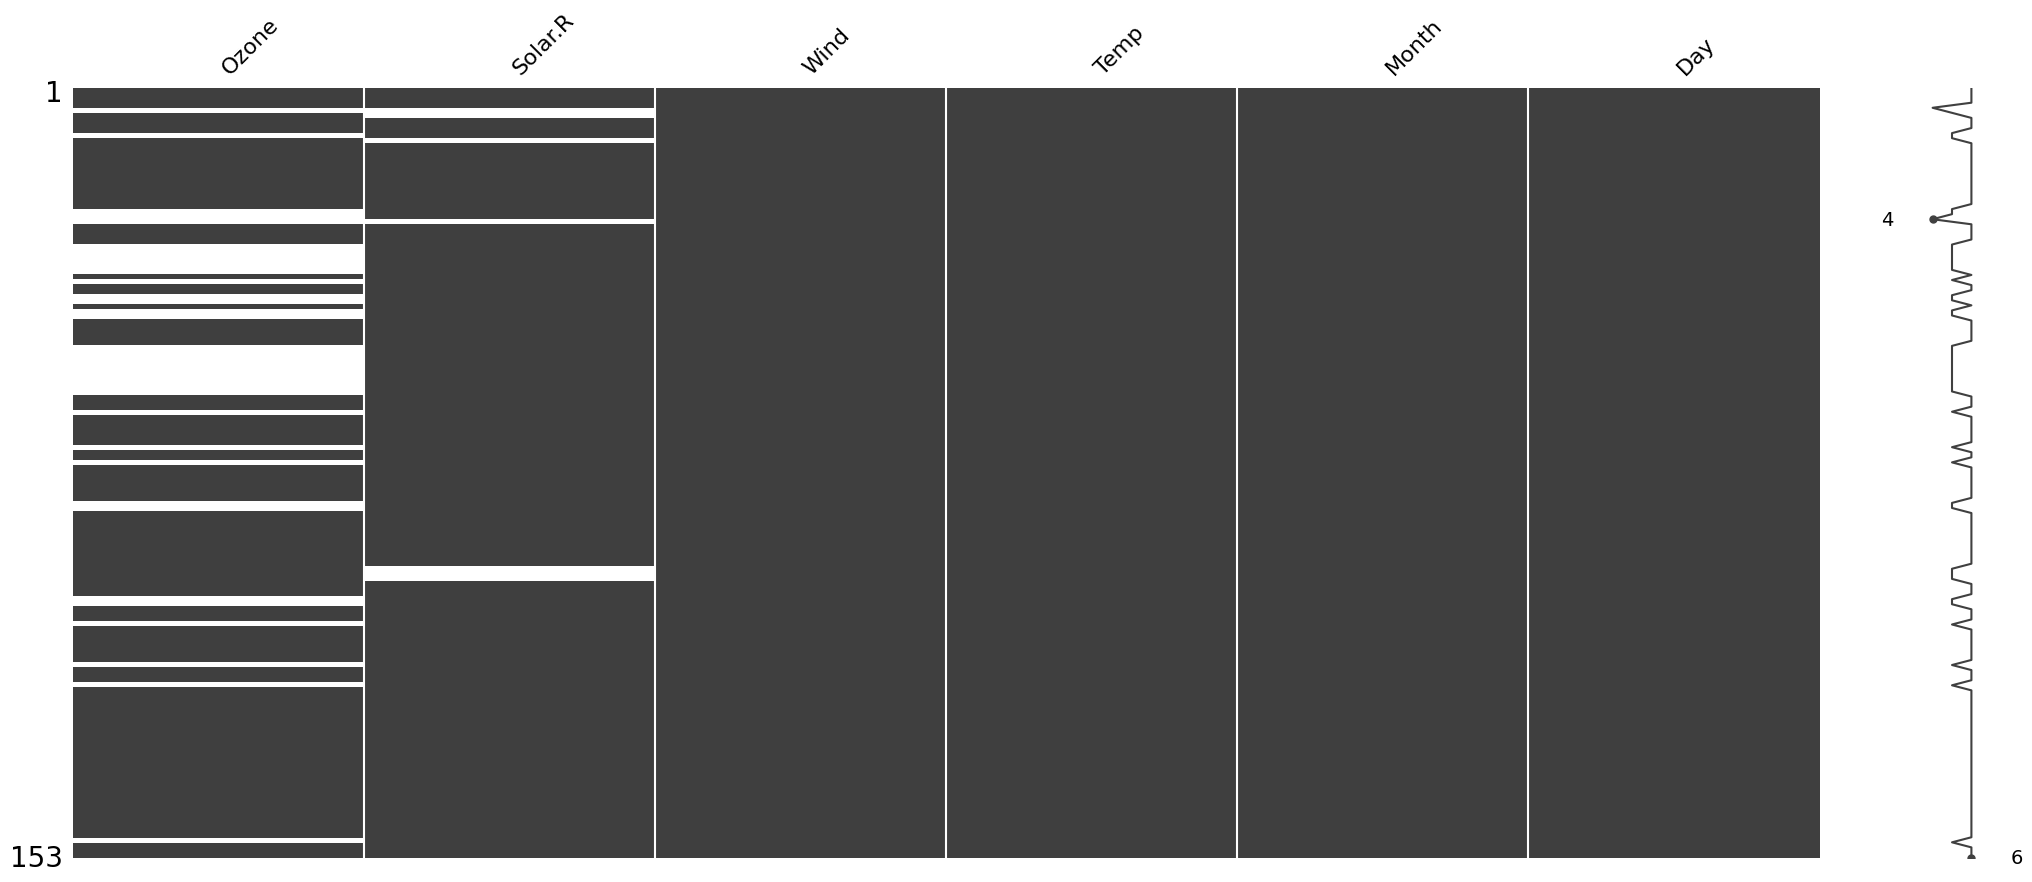

In [6]:
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missingness
msno.matrix(airquality)
plt.show()

In [9]:
# Isolate missing and complete values aside
missing_o = airquality[airquality['Ozone'].isna()]
complete_o = airquality[~airquality['Ozone'].isna()]

In [10]:
# Isolate missing and complete values aside
missing_s = airquality[airquality['Solar.R'].isna()]
complete_s = airquality[~airquality['Solar.R'].isna()]

In [11]:
# Describe missing DataFramee
missing_o.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,0.0,35.000000,37.000000,37.000000,37.000000,37.000000
mean,NaN,189.514286,10.256757,77.918919,6.351351,16.648649
std,NaN,87.694782,3.385142,9.531755,0.977986,9.286239
min,NaN,31.000000,1.700000,56.000000,5.000000,1.000000
25%,NaN,131.000000,8.000000,75.000000,6.000000,10.000000
50%,NaN,194.000000,9.700000,79.000000,6.000000,15.000000
75%,NaN,261.500000,12.600000,84.000000,7.000000,25.000000
max,NaN,332.000000,16.600000,93.000000,9.000000,30.000000


In [12]:
# Describe complete DataFramee
complete_o.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,111.000000,116.000000,116.000000,116.000000,116.000000
mean,42.129310,184.801802,9.862069,77.870690,7.198276,15.534483
std,32.987885,91.152302,3.574856,9.485486,1.475715,8.750087
min,1.000000,7.000000,2.300000,57.000000,5.000000,1.000000
25%,18.000000,113.500000,7.400000,71.000000,6.000000,8.000000
50%,31.500000,207.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,255.500000,11.500000,85.000000,8.250000,22.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [14]:
missing_s.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,5.000000,0.0,7.000000,7.00000,7.000000,7.000000
mean,42.800000,NaN,9.000000,73.00000,6.285714,9.142857
std,28.891175,NaN,3.971566,13.56466,1.603567,8.194075
min,7.000000,NaN,4.600000,56.00000,5.000000,4.000000
25%,28.000000,NaN,6.900000,61.50000,5.000000,5.000000
50%,35.000000,NaN,7.400000,74.00000,5.000000,6.000000
75%,66.000000,NaN,11.150000,85.50000,8.000000,8.500000
max,78.000000,NaN,14.900000,87.00000,8.000000,27.000000


In [13]:
complete_s.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,111.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,42.099099,185.931507,10.003425,78.116438,7.027397,16.123288
std,33.275969,90.058422,3.508795,9.224787,1.404157,8.794897
min,1.000000,7.000000,1.700000,57.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,73.000000,6.000000,9.000000
50%,31.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,62.000000,258.750000,11.500000,84.000000,8.000000,23.750000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


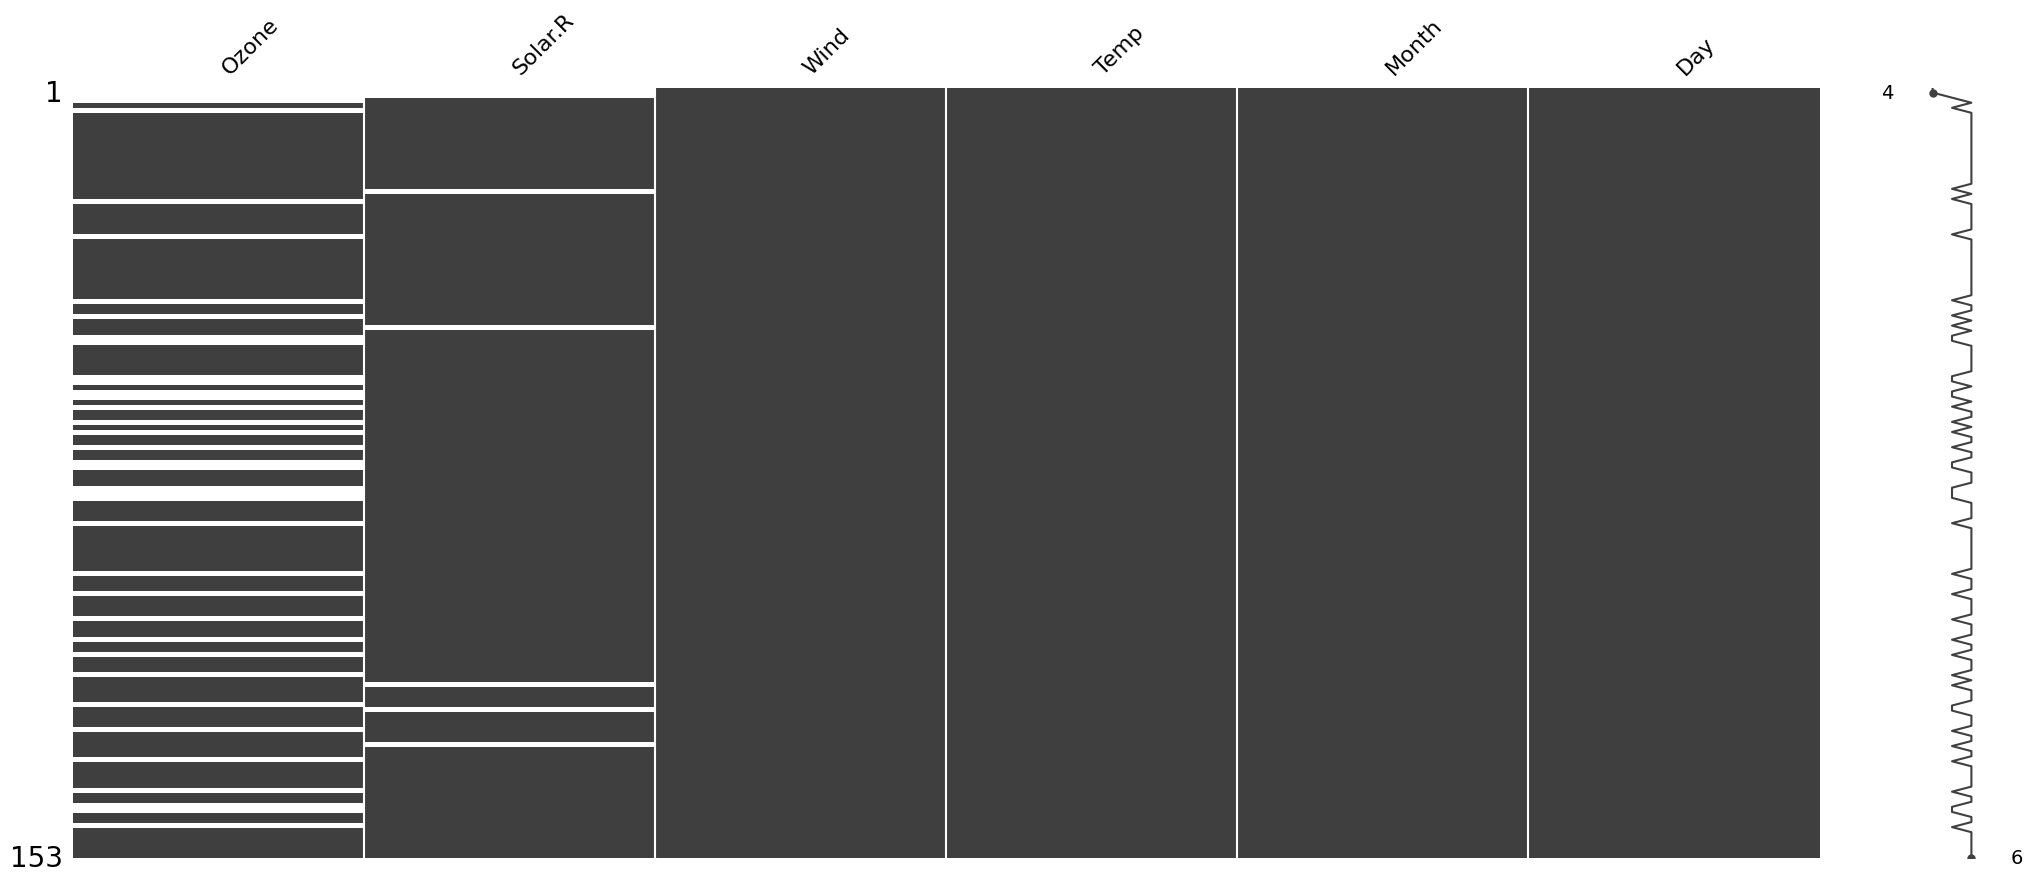

In [15]:
sorted_airquality = airquality.sort_values(by = 'Temp')
msno.matrix(sorted_airquality)
plt.show()

#### How to deal with missing data?
Simple approaches:
- 1. Drop missing data
- 2. Impute with statistical measures (mean, median, mode..)\
More complex approaches:
- 1. Imputing using an algorithmic approach
- 2. Impute with machine learning models


#### Dealing with missing data

In [19]:
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.0,193.0,6.9,70,9,26
150,NaN,145.0,13.2,77,9,27
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


#### Dropping missing values

In [18]:
# Drop missing values
airquality_droped = airquality.dropna(subset=['Ozone','Solar.R'])
airquality_droped

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
148,14.0,20.0,16.6,63,9,25
149,30.0,193.0,6.9,70,9,26
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


#### Replacing with statistical measures

In [25]:
ozone_mean = airquality['Ozone'].mean()
airquality_imputed = airquality.fillna({'Ozone':ozone_mean})
airquality_imputed

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.00000,190.0,7.4,67,5,1
2,36.00000,118.0,8.0,72,5,2
3,12.00000,149.0,12.6,74,5,3
4,18.00000,313.0,11.5,62,5,4
5,42.12931,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.00000,193.0,6.9,70,9,26
150,42.12931,145.0,13.2,77,9,27
151,14.00000,191.0,14.3,75,9,28
152,18.00000,131.0,8.0,76,9,29


In [22]:
solar_mean = airquality['Solar.R'].mean()
airquality_imputed = airquality.fillna({'Solar.R':solar_mean})
airquality_imputed

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.000000,7.4,67,5,1
2,36.0,118.000000,8.0,72,5,2
3,12.0,149.000000,12.6,74,5,3
4,18.0,313.000000,11.5,62,5,4
5,NaN,185.931507,14.3,56,5,5
...,...,...,...,...,...,...
149,30.0,193.000000,6.9,70,9,26
150,NaN,145.000000,13.2,77,9,27
151,14.0,191.000000,14.3,75,9,28
152,18.0,131.000000,8.0,76,9,29


#### Is this missing at random?
You've seen in the video exercise how there are a variety of missingness types when observing missing data. As a reminder, missingness types can be described as the following:

- Missing Completely at Random: No systematic relationship between a column's missing values and other or own values.
- Missing at Random: There is a systematic relationship between a column's missing values and other observed values.
- Missing not at Random: There is a systematic relationship between a column's missing values and unobserved values.

You have a DataFrame containing customer satisfaction scores for a service. What type of missingness is the following?

A customer satisfaction_score column with missing values for highly dissatisfied customers.

Missing not at random.✅
- Awesome work! This is a clear example of missing not at random, where low values of satisfaction_score are missing because of inherently low satisfaction!

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


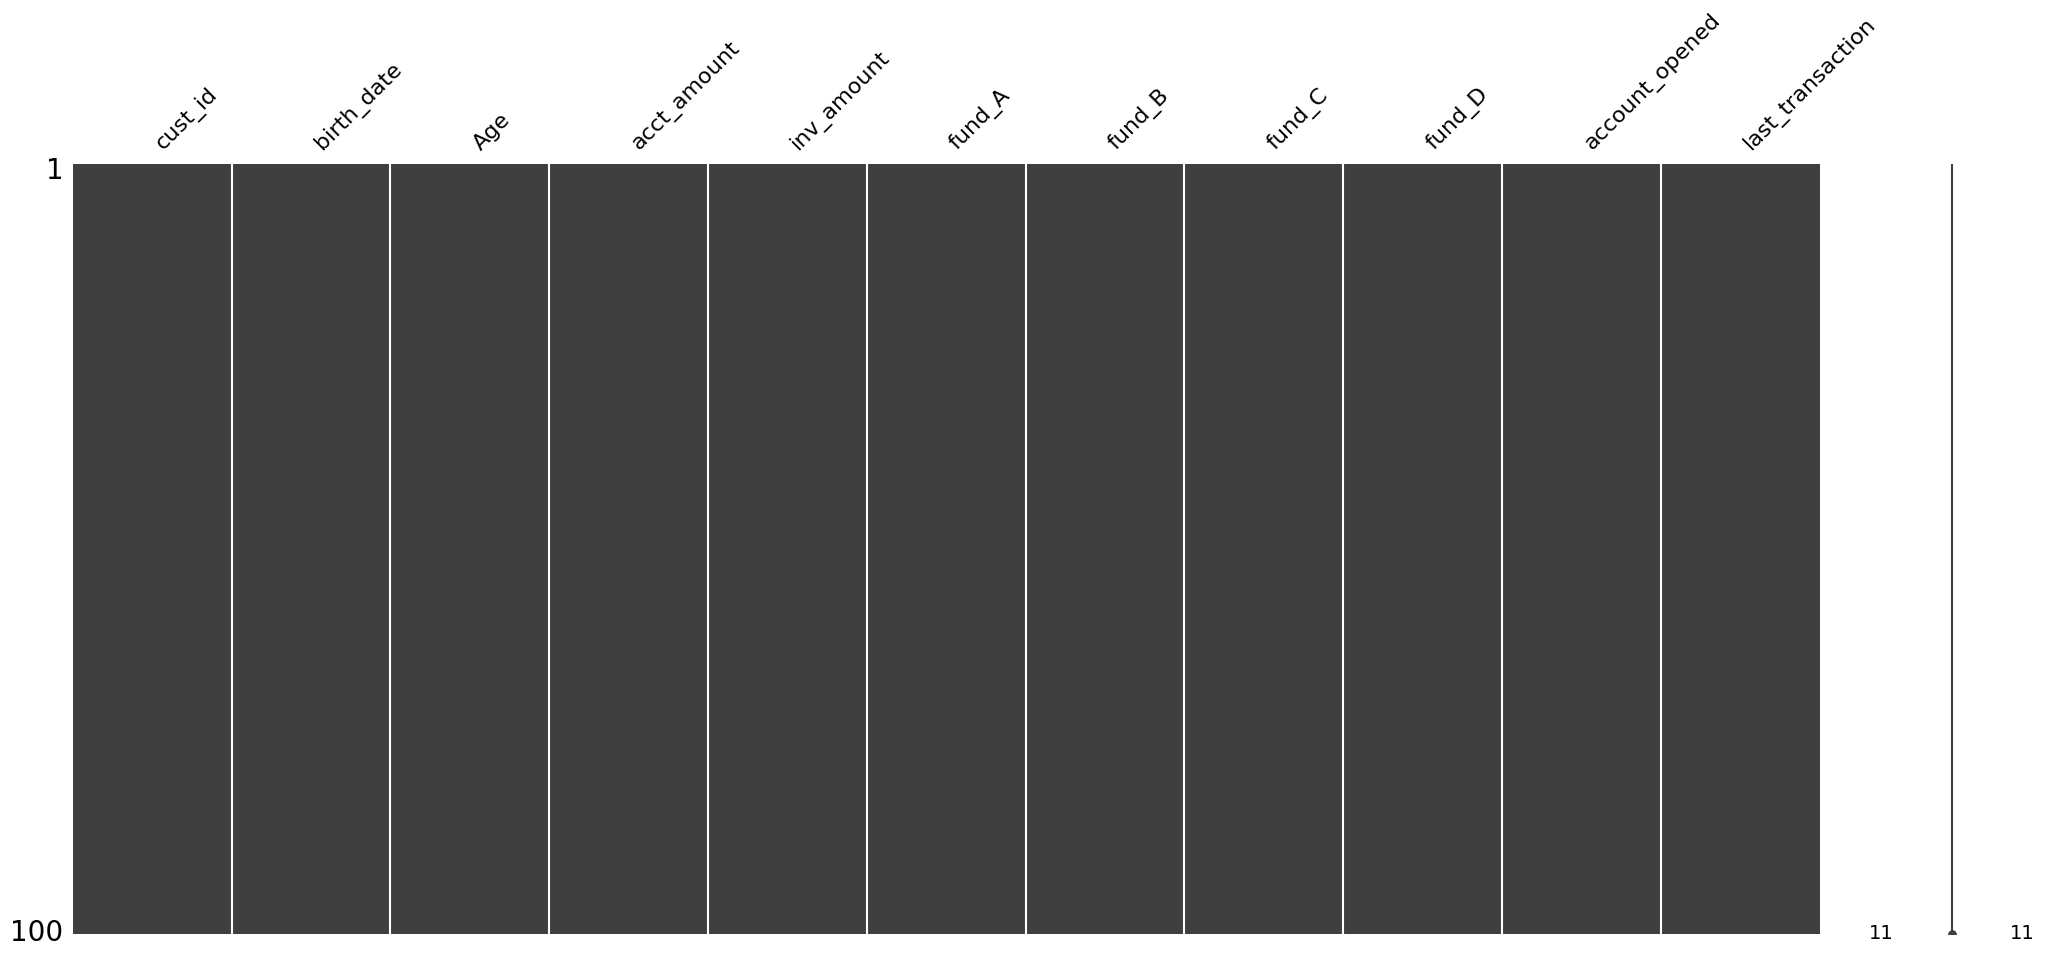

In [28]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [30]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

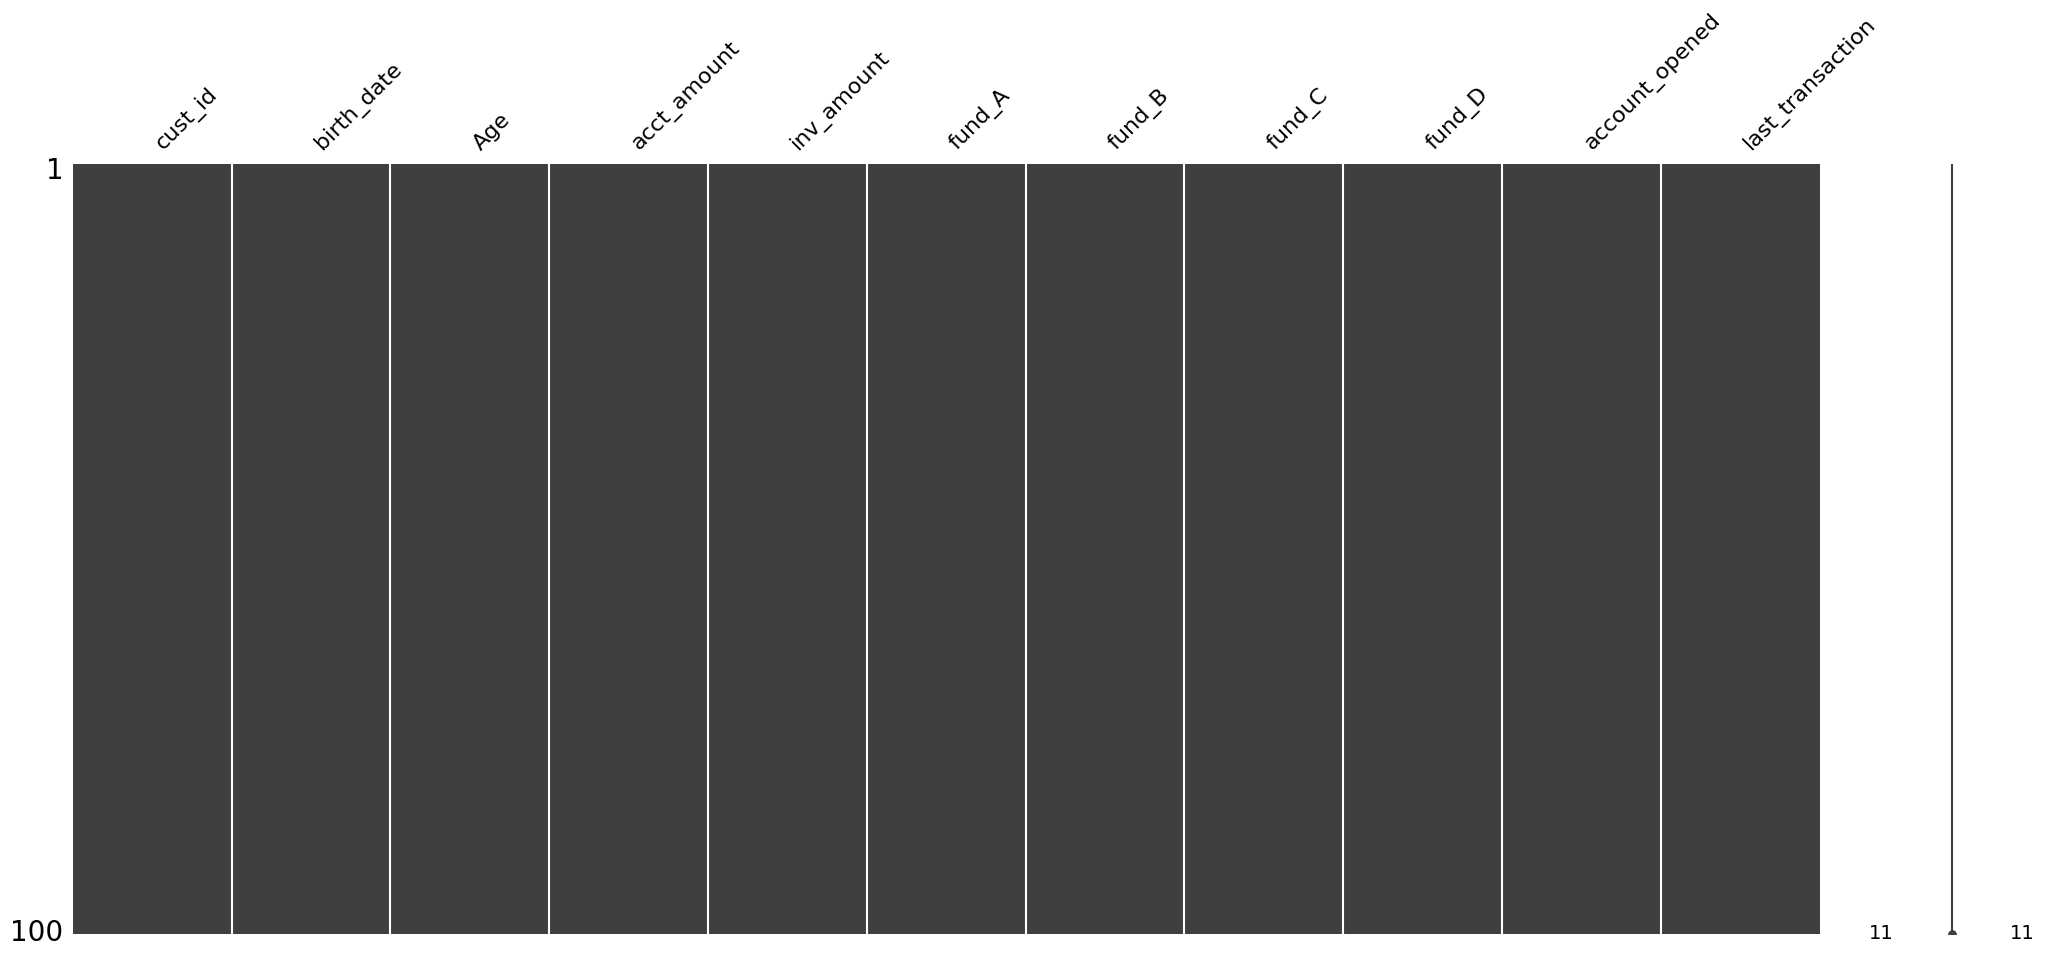

In [34]:
# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='Age')
msno.matrix(banking_sorted)
plt.show()

- Great job! Notice how all the white spaces for inv_amount are on top? Indeed missing values are only due to young bank account holders not investing their money! Better set it to 0 with .fillna().

### Follow the money
In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of acct_amount with some domain knowledge.

In [35]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking['acct_amount'].mean()

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


In [36]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5
 
# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


- Awesome work! As you can see no missing data left, you can definitely _bank_ on getting your analysis right!